In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('output.csv')
data.loc[data.region == '[RU:17:area.None]', 'region'] = 'Минск'
data.loc[data.employment_type=='FULL_TIME', 'employment_type'] = 'Полная'
data.loc[data.employment_type=='INTERN', 'employment_type'] = 'Стажировка'
data.loc[data.employment_type=='PART_TIME', 'employment_type'] = 'Частичная'
data.loc[data.employment_type=='TEMPORARY', 'employment_type'] = 'Временная'

In [3]:
data.salary = data.salary.str.split().str.join('')
a =[int(''.join(re.findall(r'до(\d+)', salary))) for salary in data.loc[(data.min_salary.isnull()) & (data.salary != 'з/пнеуказана'), 'salary'].values]
data.loc[(data.min_salary.isnull()) & (data.salary != 'з/пнеуказана'), 'max_salary'] = a

data.loc[data.salary == 'з/пнеуказана', 'new_salary'] = None
data.loc[(data.min_salary.isnull()) 
         & (data.salary != 'з/пнеуказана'), 'new_salary'] = data[(data.min_salary.isnull()) 
                                                                 & (data.salary != 'з/пнеуказана')].max_salary
data.loc[(data.max_salary.isnull()) 
         & (data.salary != 'з/пнеуказана'), 'new_salary'] = data[(data.max_salary.isnull()) 
                                                                 & (data.salary != 'з/пнеуказана')].min_salary
data.loc[(data.max_salary.notnull()) 
         & (data.min_salary.notnull())
         & (data.salary != 'з/пнеуказана'), 'new_salary'] = (data[(data.max_salary.notnull()) 
                                                                  & (data.min_salary.notnull())
                                                                  & (data.salary != 'з/пнеуказана')].min_salary 
                                                             + data[(data.max_salary.notnull()) 
                                                                     & (data.min_salary.notnull())
                                                                     & (data.salary != 'з/пнеуказана')].max_salary) / 2


In [4]:
def plot_pie(counts, labels, name, title, startangle=150):
    plt.pie(counts, autopct='%1.1f%%', startangle=startangle)
    plt.axis('equal')
    plt.legend(labels)
    plt.title(title)
    plt.savefig('./plots/{}.png'.format(name))
    plt.show()

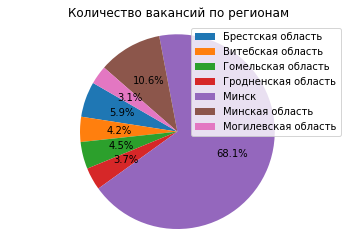

In [5]:
grouped_by_region = data.loc[data.region.notnull(), ['region', 'title']].groupby('region').count().reset_index()
plot_pie(grouped_by_region.title.values, 
         grouped_by_region.region.values, 
         name='by_region', 
         title='Количество вакансий по регионам')

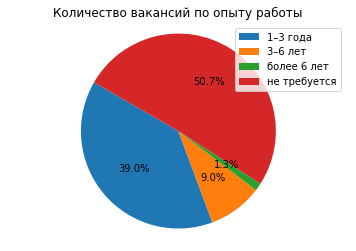

In [6]:
grouped_by_experience = data.loc[data.region.notnull(), 
                                 ['experience', 'title']].groupby('experience').count().reset_index()
plot_pie(grouped_by_experience.title.values, 
         grouped_by_experience.experience.values,
         startangle=150,
         name='by_experience',
         title='Количество вакансий по опыту работы')

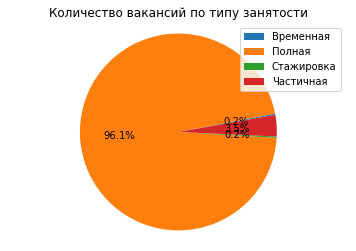

In [7]:
grouped_by_employment_type = data.loc[data.employment_type.notnull(), 
                                      ['employment_type', 
                                       'title']].groupby('employment_type').count().reset_index()
plot_pie(grouped_by_employment_type.title.values, 
         grouped_by_employment_type.employment_type.values, 
         startangle=10,
         name='by_employment_type', 
         title='Количество вакансий по типу занятости')

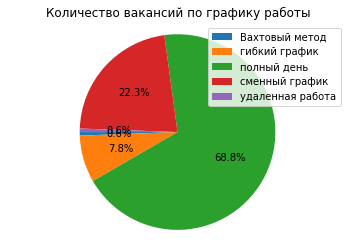

In [8]:
grouped_by_work_hours = data.loc[data.work_hours.notnull(), 
                                 ['work_hours', 'title']].groupby('work_hours').count().reset_index()
plot_pie(grouped_by_work_hours.title.values, 
         grouped_by_work_hours.work_hours.values, 
         startangle=180,
         name='by_work_hours', 
         title='Количество вакансий по графику работы')

In [6]:
for index, value in enumerate(data.work_hours.unique()):
    data.loc[data.work_hours == value,'work_hours_index'] = index
for index, value in enumerate(data.employment_type.unique()):
    data.loc[data.employment_type == value,'employment_index'] = index
for index, value in enumerate(data.experience.unique()):
    data.loc[data.experience == value,'experience_index'] = index
for index, value in enumerate(data.region.unique()):
    data.loc[data.region == value,'region_index'] = index

In [7]:
data

experience                                              title  \
0     не требуется                                      Офис-менеджер   
1     не требуется                               Продавец-консультант   
2          3–6 лет                Начальник сметно-договорного отдела   
3     не требуется                      Агент / специалист по туризму   
4         1–3 года                                       Мерчендайзер   
5     не требуется               Продавец-консультант (ТЦ "Dana Mall)   
6     не требуется                    Начинающий менеджер по продажам   
7         1–3 года                                      Офис-менеджер   
8          3–6 лет                                       Юрисконсульт   
9     не требуется                                        Оператор ПК   
10        1–3 года            Руководитель отдела закупок и логистики   
11    не требуется                                             Пиццер   
12    не требуется           Менеджер по продажам / Продавец-замерщик   
13    не требуется                   Специалист по работе с клиентами   
14    не требуется                                            Грузчик   
15    не требуется                         Водитель такси Яндекс-Убер   
16         3–6 лет                        Управляющий розничной сетью   
17    не требуется                          Контролер-кассир (Жодино)   
18    не требуется                              Водитель яндекс.такси   
19    не требуется              Продавец-консультант в магазин одежды   
20        1–3 года          Руководитель группы продаж портала 103.by   
21    не требуется           Специалист кредитного центра, г. Червень   
22    не требуется                               Оператор call-центра   
23        1–3 года  Специалист по продаже информационно-технологич...   
24        1–3 года  Продавец-консультант мебели в фирменный магази...   
25    не требуется                      Специалист по расценке товара   
26        1–3 года                        Монтажник окон и дверей ПВХ   
27    не требуется           Водитель категории В (Яндекс.Такси/Uber)   
28        1–3 года                                       Юрисконсульт   
29        1–3 года                      Слесарь механосборочных работ   
...            ...                                                ...   
1874      1–3 года                          Главный специалист по ОРБ   
1875  не требуется                               Продавец-консультант   
1876  не требуется                                    Инженер-сметчик   
1877       3–6 лет  Начальник административного отдела (офис-менед...   
1878      1–3 года                                  Главный бухгалтер   
1879       3–6 лет  Электромонтер по ремонту и обслуживанию электр...   
1880       3–6 лет                                 Ведущий архитектор   
1881      1–3 года      Директор магазина (г. Червень, ул. Горбачева)   
1882       3–6 лет                                     Маляр-штукатур   
1883  не требуется                  Региональный менеджер по продажам   
1884  не требуется                   Специалист технической поддержки   
1885      1–3 года                                      Электромонтер   
1886      1–3 года  Руководитель отдела розничных продаж отопитель...   
1887  не требуется                                 Укладчик-упаковщик   
1888      1–3 года                    Швея - вышивальщица/вышивальщик   
1889  не требуется                   Контролер-кассир (ул. Пролыгина)   
1890  не требуется          Специалист по продажам в интернет-магазин   
1891      1–3 года                                Инспектор по кадрам   
1892  не требуется                                        Ученик швеи   
1893      1–3 года                                 Экономист-аналитик   
1894       3–6 лет                                       Юрисконсульт   
1895      1–3 года                          Медицинский представитель   
1896      1–3 года                               Автомаляр - кузов

In [15]:
data.drop( data[data.region_index.isna()].index , inplace=True)

In [29]:
df = data.loc[data.new_salary.notna(), ['region_index',
                                        'experience_index',
                                        'employment_index', 
                                        'work_hours_index', 
                                        'new_salary']].groupby(['region_index', 
                                                                'experience_index', 
                                                                'employment_index', 
                                                                'work_hours_index']).mean().reset_index()

In [42]:
X = df[['region_index', 'experience_index', 'employment_index', 'work_hours_index']].values
Y = df.new_salary.values.reshape(-1, 1)
linear_regressor = LinearRegression().fit(X, Y)
X_pred = np.array([1, 0, 1, 1]).reshape(1, -1)
Y_pred = linear_regressor.predict(X_pred)

In [43]:
Y_pred

array([[584.16471168]])

In [48]:
df[(df.region_index==1) 
   & (df.experience_index == 0) 
   & (df.employment_index == 1) 
   & (df.work_hours_index == 1)]

region_index  experience_index  employment_index  work_hours_index  \
10           1.0               0.0               1.0               1.0   

    new_salary  
10       587.5

In [51]:
584.16/587.5 - 1

-0.005685106382978811

In [25]:
def insert_average_column(column_name):
    avrg_salary = data.loc[data.work_hours.notnull(), 
                                     [column_name, 'new_salary']].groupby(column_name).mean().reset_index()
    avrg_salary.columns = ['type', 'average']
    for index, row in avrg_salary.iterrows():
        data.loc[data[column_name] == row.type, 'avr_by_{}'.format(column_name)] = row.average

In [26]:
insert_average_column('work_hours')
insert_average_column('work_hours')

In [27]:
data[:5]

experience                                title              region  \
0  не требуется                        Офис-менеджер   Брестская область   
1  не требуется                 Продавец-консультант               Минск   
2       3–6 лет  Начальник сметно-договорного отдела               Минск   
3  не требуется        Агент / специалист по туризму               Минск   
4      1–3 года                         Мерчендайзер  Гомельская область   

                               salary  max_salary  \
0  от600до1000бел.руб.довычетаналогов      1000.0   
1        от720бел.руб.довычетаналогов         NaN   
2                        з/пнеуказана         NaN   
3           от900до2250бел.руб.наруки      2250.0   
4            от620до670бел.руб.наруки       670.0   

                                            industry  \
0  Бухгалтерия, управленческий учет, финансы пред...   
1                   Продажи,Начало карьеры, студенты   
2                        Строительство, недвижимость   
3  Туризм, гостиницы, рестораны,Начало карьеры, с...   
4                             Маркетинг, реклама, PR   

                             company_name employment_type  min_salary  \
0                              ООО Гюзаль          Полная       600.0   
1  Торговая сеть «СПОРТМАСТЕР» (Беларусь)          Полная       720.0   
2                 Иностр. п. Миатон, ИООО          Полная         NaN   
3                         ООО Мэйк Трэвел          Полная       900.0   
4       ЗАО Минский завод виноградных вин          Полная       620.0   

  locality      work_hours  new_salary    avr_by_wh  avr_by_work_hours  
0      NaN     полный день       800.0  1090.645859        1090.645859  
1      NaN  сменный график       720.0   829.875000         829.875000  
2      NaN     полный день         NaN  1090.645859        1090.645859  
3      NaN     полный день      1575.0  1090.645859        1090.645859  
4      NaN     полный день       645.0  1090.645859        1090.645859

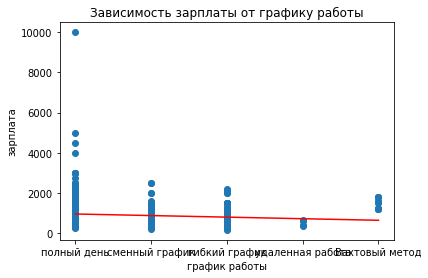

In [15]:
linear_regressor = LinearRegression()
X = data[data.min_salary.notnull() & (data.min_salary < 15000) & (data.salary != 'з/пнеуказана')].work_hours_index.values.reshape(-1, 1)
Y = data[data.min_salary.notnull() & (data.min_salary < 15000) & (data.salary != 'з/пнеуказана')].min_salary.values.reshape(-1, 1)
linear_regressor.fit(X, Y)
X_pred = np.unique(X).reshape(-1, 1)
Y_pred = linear_regressor.predict(X_pred)
plt.scatter(X, Y)
plt.plot(X_pred, Y_pred, color='red')
plt.xticks(range(len(data.work_hours.unique())), data.work_hours.unique())
plt.title('Зависимость зарплаты от графику работы')
plt.ylabel('зарплата')
plt.xlabel('график работы')
plt.savefig('./plots/{}.png'.format('zp_by_work_hours'))
plt.show()

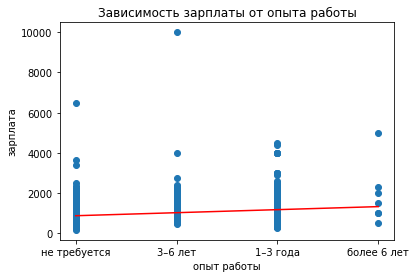

In [14]:
linear_regressor = LinearRegression()
X = data[data.min_salary.notnull() & (data.min_salary < 15000) & (data.salary != 'з/пнеуказана')].experience_index.values.reshape(-1, 1)
Y = data[data.min_salary.notnull() & (data.min_salary < 15000) & (data.salary != 'з/пнеуказана')].new_salary.values.reshape(-1, 1)
linear_regressor.fit(X, Y)
X_pred = np.unique(X).reshape(-1, 1)
Y_pred = linear_regressor.predict(X_pred)
plt.scatter(X, Y)
plt.plot(X_pred, Y_pred, color='red')
plt.xticks(range(len(data.experience.unique())), data.experience.unique())
plt.title('Зависимость зарплаты от опыта работы')
plt.ylabel('зарплата')
plt.xlabel('опыт работы')
plt.savefig('./plots/{}.png'.format('zp_by_experience'))
plt.show()

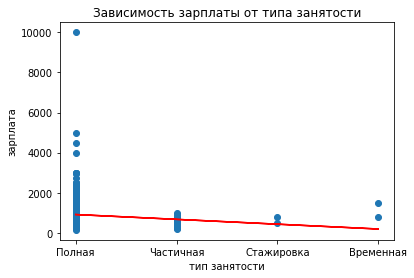

In [16]:
linear_regressor = LinearRegression()
X = data[data.min_salary.notnull() & (data.min_salary < 15000) & (data.salary != 'з/пнеуказана')].employment_index.values.reshape(-1, 1)
Y = data[data.min_salary.notnull() & (data.min_salary < 15000) & (data.salary != 'з/пнеуказана')].min_salary.values.reshape(-1, 1)
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red', label="base on data size")
plt.xticks(range(len(data.employment_type.unique())), data.employment_type.unique())
plt.title('Зависимость зарплаты от типа занятости')
plt.ylabel('зарплата')
plt.xlabel('тип занятости')
plt.savefig('./plots/{}.png'.format('zp_by_employment'))
plt.show()

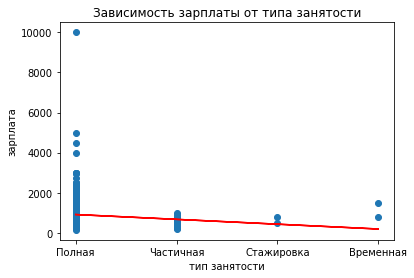

In [17]:
linear_regressor = LinearRegression()
X = data[data.min_salary.notnull() & (data.min_salary < 15000) & (data.salary != 'з/пнеуказана')].employment_index.values.reshape(-1, 1)
Y = data[data.min_salary.notnull() & (data.min_salary < 15000) & (data.salary != 'з/пнеуказана')].min_salary.values.reshape(-1, 1)
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red', label="base on data size")
plt.xticks(range(len(data.employment_type.unique())), data.employment_type.unique())
plt.title('Зависимость зарплаты от типа занятости')
plt.ylabel('зарплата')
plt.xlabel('тип занятости')
plt.savefig('./plots/{}.png'.format('zp_by_employment'))
plt.show()

In [18]:
grouped_by_employment_type

employment_type  title
0       Временная      4
1          Полная   1829
2      Стажировка      4
3       Частичная     67

In [49]:
data.shape

(936, 16)

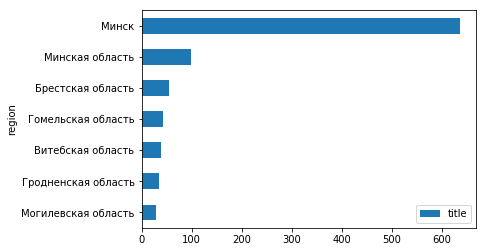

In [9]:
grouped_by_region.sort_values('title').plot.barh(y='title', x='region')
# plt.savefig('./plots/by_region.png')